In [1]:
from analysis_tools import Dataset, Process, Feature
from pprint import pprint

In [ ]:
vbf_sm_process = Process("vbf_sm", "VBFSM", color=(0, 0, 0))
vbf = Dataset("vbf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/VBFHHTo2B2Tau_CV_1_C2V_1_C3_1_TuneCP5_PSWeights_13TeV-madgraph-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             vbf_sm_process,
             prefix="cmsxrootd-1.gridka.de:1094/")

latino = Dataset("lat",
                "/store/group/phys_higgs/cmshww/amassiro/HWWNano/Autumn18_102X_nAODv7_Full2018v7/MCl1loose2018v7__MCCorr2018v7__l2loose__l2tightOR2018v7__JESTotalup_suffix/",
                vbf_sm_process,
                prefix="eoscms.cern.ch/")

pprint(latino.get_files()[0:10])

In [2]:
ggf_sm_process = Process("ggf_sm", "GGFSM", color=(0, 0, 0))
ggf = Dataset("ggf_sm",
             "/store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/",
             ggf_sm_process,
             prefix="ingrid-se04.cism.ucl.ac.be:1094/")
# pprint(ggf.get_files()[0:])

In [ ]:
# Create dy process and dataset (whose files are in desy, so we must use xrootd)
dy_process = Process("dy", "DY", color=(255, 0, 0))
d = Dataset("dy_low", 
            "/store/mc/RunIISummer16NanoAODv7/DYJetsToLL_M-50_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/NANOAODSIM/PUMoriond17_Nano02Apr2020_102X_mcRun2_asymptotic_v8_ext2-v1/110000/",
            dy_process,
            prefix="dcache-cms-xrootd.desy.de:1094/"
           )
# let's see which files we are considering
# don't forget to voms-proxy before!
pprint(d.get_files()[0:])

In [3]:
# lets plot stuff using ROOT RDataFrame
import ROOT
# ROOT.ROOT.EnableImplicitMT()
files = ggf.get_files()[0:1]
dataframe_files = ROOT.vector(str)()
for f in files:
    dataframe_files.push_back(f)
df = ROOT.RDataFrame("Events", dataframe_files)

#files = latino.get_files()[0:1]
#dataframe_files = ROOT.vector(str)()
#for f in files:
#    dataframe_files.push_back(f)
#lat_df = ROOT.RDataFrame("Events", dataframe_files)
#pprint ([col for col in df.GetColumnNames() if col not in lat_df.GetColumnNames()])

Welcome to JupyROOT 6.18/04


In [4]:
print files

['root://ingrid-se04.cism.ucl.ac.be:1094//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/166F2B3B-1C4C-3948-B794-6DA8F17737F6.root']


In [13]:
print [col for col in df.GetColumnNames() if "genpart".lower() in col.lower()]

['nGenPart', 'GenPart_eta', 'GenPart_mass', 'GenPart_phi', 'GenPart_pt', 'GenPart_genPartIdxMother', 'GenPart_pdgId', 'GenPart_status', 'GenPart_statusFlags', 'GenVisTau_genPartIdxMother', 'Electron_genPartIdx', 'Electron_genPartFlav', 'Muon_genPartIdx', 'Muon_genPartFlav', 'Photon_genPartIdx', 'Photon_genPartFlav', 'Tau_genPartIdx', 'Tau_genPartFlav']


# DeepTau

### Tau_idDeepTau2017v2p1VSmu

bitmask 1 = VLoose, 2 = Loose, 4 = Medium, 8 = Tight

This actually translates to
1 = VLoose, 3 = Loose, 7 = Medium, 15 = Tight

### Tau_idDeepTau2017v2p1VSe 

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255

### Tau_idDeepTau2017v2p1VSjet

bitmask 1 = VVVLoose, 2 = VVLoose, 4 = VLoose, 8 = Loose, 16 = Medium, 32 = Tight, 64 = VTight, 128 = VVTight*

 1, 3, 7, 15, 31, 63, 127, 255


In [5]:
ROOT.gInterpreter.Declare("""
    bool is_wp(unsigned char v, int initial, int final){
         if ((int(v) >= int(std::pow(2, initial)) - 1) && (int(v) <= int(std::pow(2, final)) - 1)) return true;
         return false;
    }
""")

ROOT.gInterpreter.Declare("""
    using Vchar = const ROOT::RVec<unsigned char>&;
    ROOT::RVec<unsigned char> vec_wp(Vchar v, int initial, int final){
        ROOT::RVec<unsigned char> a;
        for (size_t i = 0; i < v.size(); i++) {
            if (is_wp(v[i], initial, final)) a.push_back(v[i]);
        }
        return a;
    }
""")
ROOT.gInterpreter.Declare("""
    using Vbool = const ROOT::RVec<bool>&;
    using Vchar = const ROOT::RVec<unsigned char>&;
    ROOT::RVec<bool> are_wp(Vchar v, int initial, int final){
        ROOT::RVec<bool> wps;
        for (size_t i = 0; i < v.size(); i++) {
            if (is_wp(v[i], initial, final)) wps.push_back(true);
            else wps.push_back(false);
        }
        return wps;
    }
""")


True

In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
#hist2 = df.Define("loose_vs_mu", 'wp(Tau_idDeepTau2017v2p1VSmu, (unsigned char*)("Loose"))').Histo1D("loose_vs_mu")
#new_df = df.Filter("Tau_idDeepTau2017v2p1VSmu[(Tau_idDeepTau2017v2p1VSmu & 3) > 0]")
histo3 = df.Define("wp","vec_wp(Tau_idDeepTau2017v2p1VSmu, 1, 2)").Histo1D("wp")
histo3.Draw()
c.Draw()

In [ ]:
ROOT.gInterpreter.Declare("""
    using VBool = const ROOT::RVec<Bool_t>&;
    using Vint = const ROOT::RVec<int>&;
    ROOT::RVec<int> get_dm(Vint dm){
        ROOT::RVec<int> int_dm;
        for (int i = 0; i < dm.size(); i++){
            if (dm[i]) int_dm.push_back(1);
            else int_dm.push_back(0);
        }
        return int_dm;
    }
""")

In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
histo7 = df.Define("dm", "get_dm(Tau_idDecayModeNewDMs)").Histo1D("dm")
histo7.Draw()
c.Draw()

In [ ]:
ROOT.gSystem.Load("../HHKinFit2/libHHKinFit2.so")
ROOT.gInterpreter.Declare('#include "/afs/cern.ch/work/j/jleonhol/private/cms_phys_ciemat/analysis_tools/HHKinFit2/interface/HHKinFitMasterHeavyHiggs.h"')


In [24]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;
    using Vint = const ROOT::RVec<int>&;
    float gen_part_inv_mass(Vfloat inp_pt, Vfloat inp_eta, Vfloat inp_phi, Vfloat inp_mass, Vint inp_id, int id){
        ROOT::RVec<float> pt, eta, phi, mass;
        for (size_t i = 0; i < inp_pt.size(); i++) {
            if (abs(inp_id[i]) == id) {
                pt.push_back(inp_pt[i]);
                eta.push_back(inp_eta[i]);
                phi.push_back(inp_phi[i]);
                mass.push_back(inp_mass[i]);
            }
        }
        if (pt.size() != 2) return -1;
        return InvariantMass(pt, eta, phi, mass);
    }
""")

True

In [22]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;
    using Vint = const ROOT::RVec<int>&;
    int nGen(Vint inp_id, int id){
        int n = 0;
        for (size_t i = 0; i < inp_id.size(); i++) {
            if (abs(inp_id[i]) == id) {
                n++;
            }
        }
        return n;
    }
""")

True

In [45]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    int nGenGoodMother (Vint pdgs, Vint mother_indexes, Vint status, int pdgid, int mother_pdgid, int mother_status){
        int n = 0;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (abs(pdgs[i]) != pdgid) continue;
            if (abs(pdgs[mother_indexes[i]]) != mother_pdgid) continue;
            if (status[mother_indexes[i]] != mother_status) continue;
            n++;
        }
        return n;
    }
""")

True

In [46]:
# invariant mass from the two taus
df_ditau = df.Define("nGenTau", "nGen(GenPart_pdgId[GenPart_status == 2], 15)").Filter("nGenTau == 2")
hmodel = ("Ditau_mass","Ditau Mass [GeV]",50, 0, 500.)
ditau_mass = df_ditau.Define("Ditau_mass", "InvariantMass(Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "Ditau_mass")
ditau_mass_eta = df_ditau.Define("Ditau_mass_eta", "InvariantMass(Tau_pt[abs(Tau_eta) < 2.1], Tau_eta[abs(Tau_eta) < 2.1], Tau_phi[abs(Tau_eta) < 2.1], Tau_mass[abs(Tau_eta) < 2.1])").Histo1D(hmodel, "Ditau_mass_eta")
digentau_mass = df_ditau.Define("Digentau_mass", "InvariantMass(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "Digentau_mass")
digenparttau_mass = df_ditau.Define("Digenparttau_mass", "gen_part_inv_mass(GenPart_pt, GenPart_eta, GenPart_phi, GenPart_mass, GenPart_pdgId, 15)").Histo1D(hmodel, "Digenparttau_mass")

hmodel = ("nTau","nTau",5, 0, 5.)
nTau = df.Histo1D(hmodel, "nTau")
nGenVisTau = df.Histo1D(hmodel, "nGenVisTau")
nGenTau = df.Define("nGenTau", "nGen(GenPart_pdgId[GenPart_status == 2], 15)").Histo1D(hmodel, "nGenTau")
nGenEleFromTau = df.Define("nGenEleFromTau", "nGenGoodMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_status, 11, 15, 2)").Histo1D(hmodel, "nGenEleFromTau")
nGenMuFromTau = df.Define("nGenMuFromTau", "nGenGoodMother(GenPart_pdgId, GenPart_genPartIdxMother, GenPart_status, 13, 15, 2)").Histo1D(hmodel, "nGenMuFromTau")

#nGenPart = df.Histo1D(hmodel, "nGenPart")

In [10]:
# What happens to the invariant mass if we only have 1 tau?
df_monotau = df.Filter("nGenVisTau == 1").Filter("nTau == 1")
hmodel = ("monotau_mass","monotau Mass [GeV]",10, -5, 5.)
tau_mass = df_monotau.Define("tau_mass", "InvariantMass(Tau_pt, Tau_eta, Tau_phi, Tau_mass)").Histo1D(hmodel, "tau_mass")
gentau_mass = df_monotau.Define("gentau_mass", "InvariantMass(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "gentau_mass")

In [5]:
hmodel = ("tau_eta","tau_eta; eta; events",50, -5, 5.)
Tau_eta = df.Histo1D(hmodel, "Tau_eta")
GenVisTau_eta = df.Histo1D(hmodel, "GenVisTau_eta")


In [ ]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&;      
    float leading_pt(Vfloat pt){
        if (pt.size() < 1) return -1;
        if (pt.size() == 1) return pt[0];
        if (pt[1] > pt[0]) return pt[1];
        else return pt[0];
    }
    float subleading_pt(Vfloat pt){
        if (pt.size() < 2) return -1;
        if (pt[0] > pt[1]) return pt[1];
        else return pt[0];
    }
""")

In [ ]:
hmodel = ("Leading_tau_pt","Leading_tau_pt [GeV]",25, 0, 200.)
lead_tau_pt = df_ditau.Define("lead_tau_pt", "leading_pt(Tau_pt)").Histo1D(hmodel, "lead_tau_pt")
lead_gentau_pt = df_ditau.Define("lead_gentau_pt", "leading_pt(GenVisTau_pt)").Histo1D(hmodel, "lead_gentau_pt")

hmodel = ("Subleading_tau_pt","subleading_tau_pt [GeV]",25, 0, 200.)
sublead_tau_pt = df_ditau.Define("sublead_tau_pt", "subleading_pt(Tau_pt)").Histo1D(hmodel, "sublead_tau_pt")
sublead_gentau_pt = df_ditau.Define("sublead_gentau_pt", "subleading_pt(GenVisTau_pt)").Histo1D(hmodel, "sublead_gentau_pt")


In [38]:
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> deltaRGenReco(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2){
        ROOT::RVec<float> deltaR;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                deltaR.push_back(fabs(v1.DeltaR(v2)));
            }
        }
        return deltaR;
    }
""")

True

In [ ]:
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 5.)
deltar_gen_reco = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")
hmodel = ("deltaR_gen_reco","deltaR(Gen, Reco) [GeV]", 100, 0, 0.1)
deltar_gen_reco_zoomed = df_ditau.Define("deltar_gen_reco", "deltaRGenReco(Tau_pt, Tau_eta, Tau_phi, Tau_mass, GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass)").Histo1D(hmodel, "deltar_gen_reco")


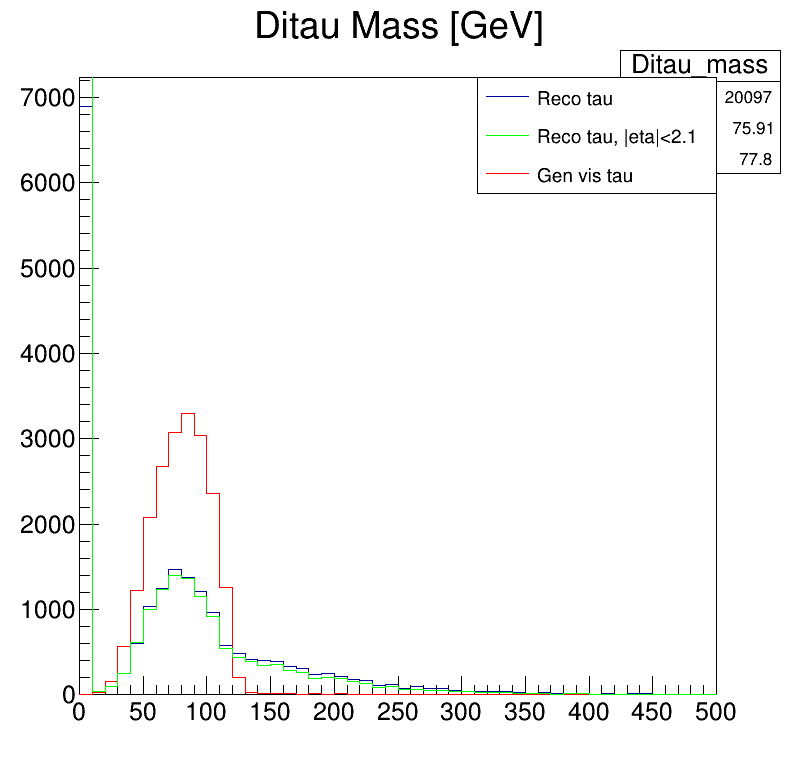

In [19]:
# invariant mass from the two taus
c = ROOT.TCanvas("", "", 800, 800)

#h3 = digenparttau_mass.Clone()



h1 = ditau_mass.Clone()
h1.Draw("same")
h2 = digentau_mass.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")


h3 = ditau_mass_eta.Clone()
h3.SetLineColor(ROOT.kGreen)
h3.Draw("same")


leg = ROOT.TLegend(0.6, 0.75, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h3, "Reco tau, |eta|<2.1", "l")
leg.AddEntry(h2, "Gen vis tau", "l")


leg.Draw("same")
c.Draw()

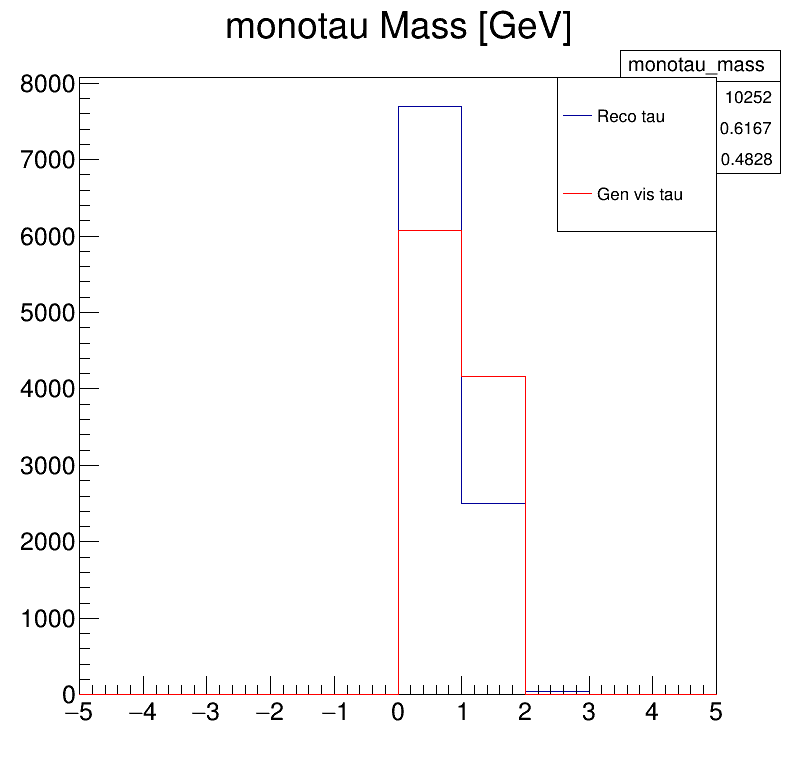

In [11]:
# invariant mass from the mono tau
c = ROOT.TCanvas("", "", 800, 800)

h1 = tau_mass.Clone()
h1.Draw("same")
h2 = gentau_mass.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")




leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau", "l")
leg.AddEntry(h2, "Gen vis tau", "l")

leg.Draw("same")
c.Draw()

In [ ]:
# leading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = lead_tau_pt.Clone()
h1.Draw()
h2 = lead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
h2.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

In [ ]:
# subleading pt
c = ROOT.TCanvas("", "", 800, 800)
h1 = sublead_tau_pt.Clone()

h2 = sublead_gentau_pt.Clone()
h2.SetLineColor(ROOT.kRed)
if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw()
    h2.Draw("same")
else:
    h2.Draw()
    h1.Draw("same")
leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

leg.Draw("same")
c.Draw()

In [ ]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco.Clone()
h1.Draw()
c.Draw()

In [ ]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_zoomed.Clone()
h1.Draw()
c.Draw()

In [19]:
# seems that cutting in 0.1 is a good idea. Let's use this cut to obtain eff vs gen pt
# let's define a function that returns the efficient pts
ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> efficient_gen_pts(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float threshold){
        ROOT::RVec<float> efficient_pts;
        int used_j = -1;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                if (j == used_j) continue;
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                if (fabs(v1.DeltaR(v2)) < threshold) {
                  efficient_pts.push_back(pt1[i]);
                  used_j = j;
                  break;
                }
            }
        }
        return efficient_pts;
    }
""")

ROOT.gInterpreter.Declare("""
    #include <TLorentzVector.h>
    using Vfloat = const ROOT::RVec<float>&;      
    ROOT::RVec<float> efficient_feat(Vfloat feat, Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float threshold){
        ROOT::RVec<float> efficient_feats;
        int used_j = -1;
        for (size_t i = 0; i < pt1.size(); i++){
            TLorentzVector v1;
            v1.SetPtEtaPhiM(pt1[i], eta1[i], phi1[i], mass1[i]);
            for (size_t j = 0; j < pt2.size(); j++){
                if (j == used_j) continue;
                TLorentzVector v2;
                v2.SetPtEtaPhiM(pt2[j], eta2[j], phi2[j], mass2[j]);
                if (fabs(v1.DeltaR(v2)) < threshold) {
                  efficient_feats.push_back(feat[i]);
                  used_j = j;
                  break;
                }
            }
        }
        return efficient_feats;
    }
""")


True

input_line_162:4:23: error: redefinition of 'efficient_gen_pts'
    ROOT::RVec<float> efficient_gen_pts(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float threshold){
                      ^
input_line_102:4:23: note: previous definition is here
    ROOT::RVec<float> efficient_gen_pts(Vfloat pt1, Vfloat eta1, Vfloat phi1, Vfloat mass1, Vfloat pt2, Vfloat eta2, Vfloat phi2, Vfloat mass2, float threshold){
                      ^


In [11]:
hmodel = ("Pt","Gen Pt [GeV]", 50, 0, 200.)
efficient_gen_pts = df_ditau.Define("efficient_gen_pts", "efficient_gen_pts(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts")
efficient_gen_pts_eta = df_ditau.Define("efficient_gen_pts_eta", "efficient_gen_pts(GenVisTau_pt[abs(GenVisTau_eta) < 2.1], GenVisTau_eta[abs(GenVisTau_eta) < 2.1], GenVisTau_phi[abs(GenVisTau_eta) < 2.1], GenVisTau_mass[abs(GenVisTau_eta) < 2.1], Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts_eta")

efficient_gen_pts_deeptau_eta = df_ditau.Define("efficient_gen_pts_deeptau_eta", "efficient_gen_pts(GenVisTau_pt[abs(GenVisTau_eta) < 2.1], GenVisTau_eta[abs(GenVisTau_eta) < 2.1], GenVisTau_phi[abs(GenVisTau_eta) < 2.1], GenVisTau_mass[abs(GenVisTau_eta) < 2.1], Tau_pt[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], Tau_eta[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], Tau_phi[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], Tau_mass[are_wp(Tau_idDeepTau2017v2p1VSjet, 5, 10)], 0.1)").Histo1D(hmodel, "efficient_gen_pts_deeptau_eta")

all_gen_pts = df_ditau.Histo1D(hmodel, "GenVisTau_pt")
all_gen_pts_eta = df_ditau.Define("GenVisTau_pt_eta", "GenVisTau_pt[abs(GenVisTau_eta)<2.1]").Histo1D(hmodel, "GenVisTau_pt_eta")



efficient_genpart_pts = df_ditau.Define("efficient_gen_pts", "efficient_gen_pts(GenVisTau_pt, GenVisTau_eta, GenVisTau_phi, GenVisTau_mass, Tau_pt, Tau_eta, Tau_phi, Tau_mass, 0.1)").Histo1D(hmodel, "efficient_gen_pts")


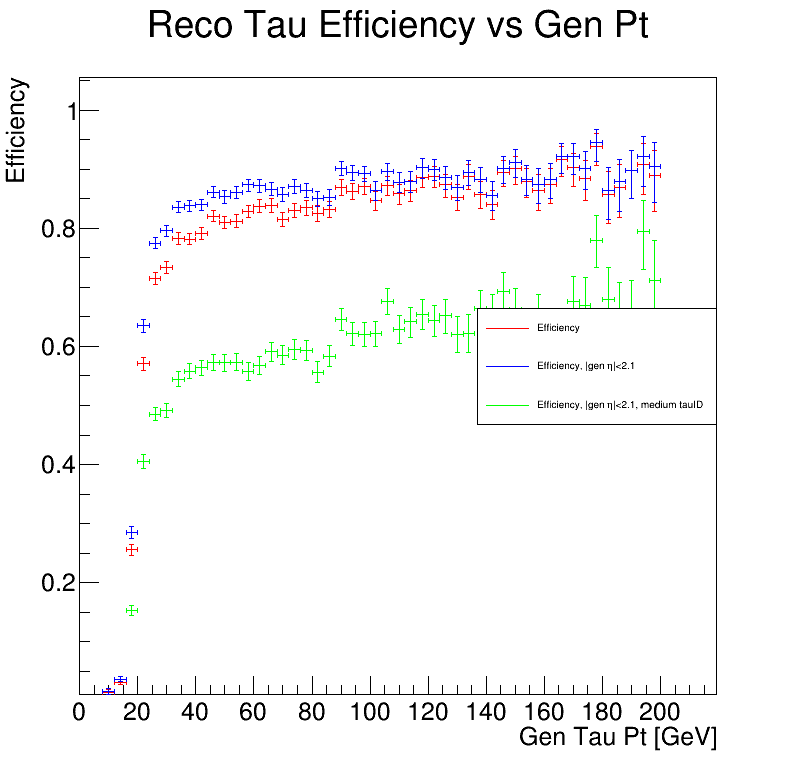

In [13]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_gen_pts.Clone()
h2 = all_gen_pts.Clone()

h3 = efficient_gen_pts_eta.Clone()
h3_id = efficient_gen_pts_deeptau_eta.Clone()
h4 = all_gen_pts_eta.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)
eff_eta = ROOT.TEfficiency(h3, h4)
eff_eta.SetLineColor(ROOT.kBlue)

eff_mediumid = ROOT.TEfficiency(h3_id, h4)
eff_mediumid.SetLineColor(ROOT.kGreen)

eff.SetTitle("Reco Tau Efficiency vs Gen Pt; Gen Tau Pt [GeV]; Efficiency")



leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "Efficiency", "l")
leg.AddEntry(eff_eta, "Efficiency, |gen #eta|<2.1", "l")
leg.AddEntry(eff_mediumid, "Efficiency, |gen #eta|<2.1, medium tauID", "l")

eff.Draw()
eff_eta.Draw("same")
eff_mediumid.Draw("same")
leg.Draw("same")
# h2.Draw()
# h1.Draw("same")
c.Draw()

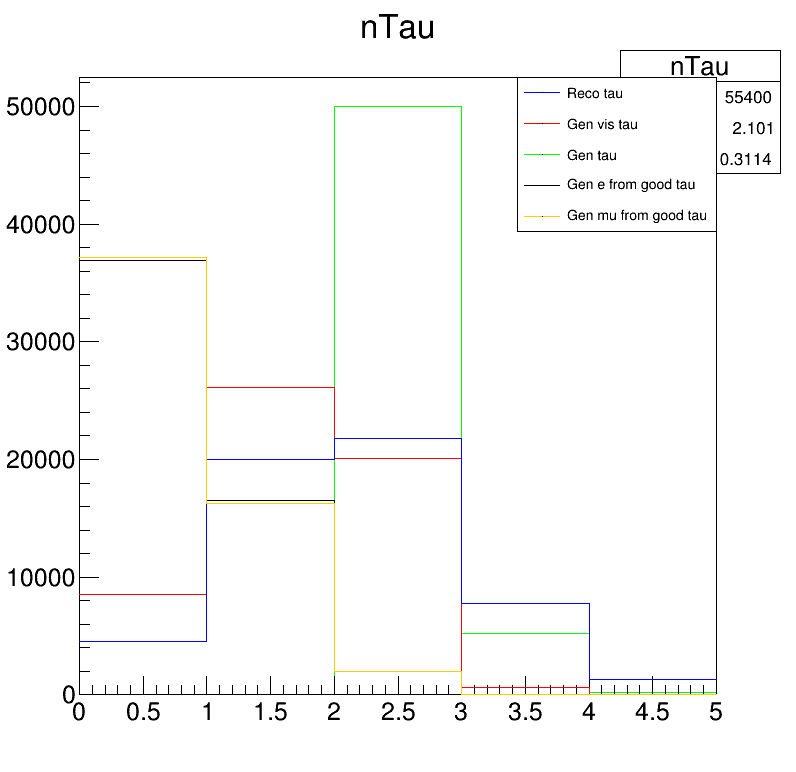

In [48]:
# Distribution of nTau and nGenTau
c = ROOT.TCanvas("", "", 800, 800)
h1 = nTau.Clone()
h2 = nGenVisTau.Clone()
h3 = nGenTau.Clone()
h4 = nGenEleFromTau.Clone()
h5 = nGenMuFromTau.Clone()
#h4 = nGenPart.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)
h3.SetLineColor(ROOT.kGreen)
h4.SetLineColor(ROOT.kBlack)
h5.SetLineColor(ROOT.kOrange)

leg = ROOT.TLegend(0.65, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")
leg.AddEntry(h3, "Gen tau")
leg.AddEntry(h4, "Gen e from good tau")
leg.AddEntry(h5, "Gen mu from good tau")
#leg.AddEntry(h4, "Gen part")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    if h1.GetMaximum() > h3.GetMaximum():
        h1.Draw("same")
        h2.Draw("same")
        h3.Draw("same")
    else:
        h3.Draw("same")
        h2.Draw("same")
        h1.Draw("same")
elif h2.GetMaximum() > h3.GetMaximum():
        h2.Draw("same")
        h1.Draw("same")
        h3.Draw("same")
else:
    h3.Draw("same")
    h2.Draw("same")
    h1.Draw("same")

h4.Draw("same")
h5.Draw("same")
    
leg.Draw()
c.Draw()

In [52]:
def get_content(h):
    value = 0
    for b in range(1, 1 + h.GetNbinsX()):
        value += (b - 1) * h.GetBinContent(b)
    return value

gentau = get_content(h3)
genvistau = get_content(h2)
gene = get_content(h4)
genmu = get_content(h5)

value = genvistau / gentau
import math
error = value * math.sqrt(1 / gentau + 1 / genvistau)

print value, error

print gene, genmu, 1 - ((gene + genmu) / gentau)

0.587113074266 0.00282977403588
20599.0 20274.0 0.648754790918


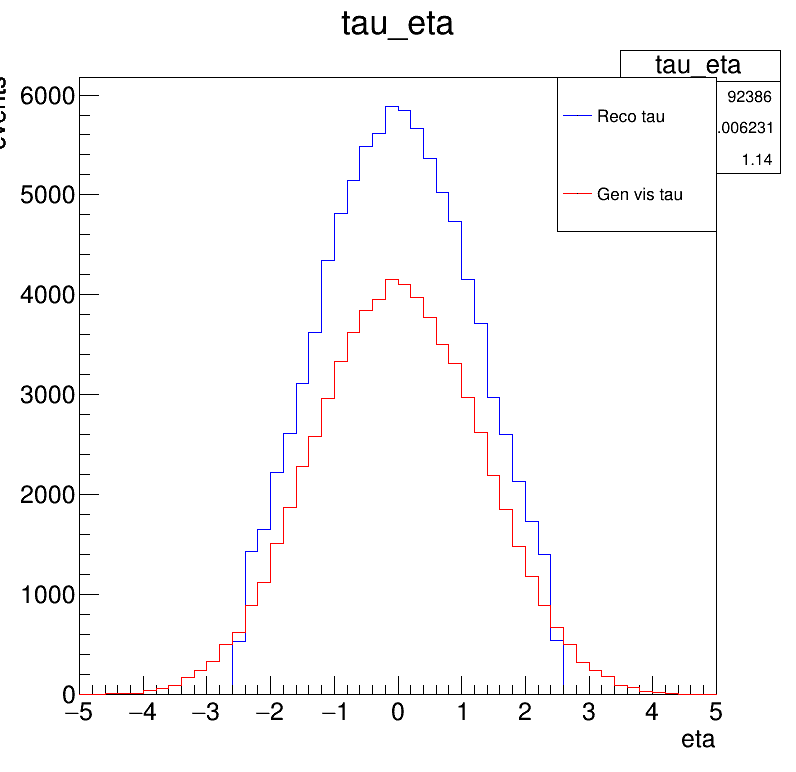

In [7]:
# Distribution of Tau_eta and GenVisTau_eta
c = ROOT.TCanvas("", "", 800, 800)
h1 = Tau_eta.Clone()
h2 = GenVisTau_eta.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco tau")
leg.AddEntry(h2, "Gen vis tau")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")    
   
leg.Draw()
c.Draw()

# btag

Our samples is from RunIIAutumn18, so the WPs must be taken from https://twiki.cern.ch/twiki/bin/viewauth/CMS/BtagRecommendation102X

|WP | Value|
| --- | --- |
|loose | 	0.0494 |
|medium |	0.2770 |
|tight |	0.7264 |

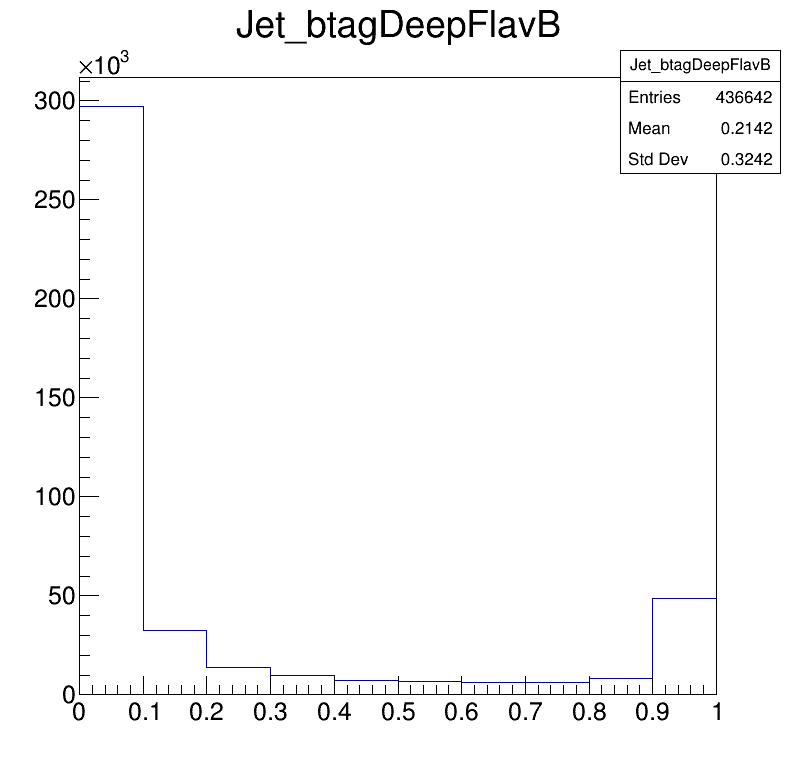

In [31]:


hmodel = ("Jet_btagDeepFlavB","Jet_btagDeepFlavB", 10, 0, 1)
Jet_btagDeepFlavB = df.Histo1D(hmodel, "Jet_btagDeepFlavB")
c = ROOT.TCanvas("", "", 800, 800)
Jet_btagDeepFlavB.Draw()
c.Draw()

In [41]:
hmodel = ("deltaR_jet","deltaR(GenJet, Jet) [GeV]", 100, 0, 5.)
deltar_gen_reco_jet = df.Define("deltar_gen_reco_jet", "deltaRGenReco(Jet_pt, Jet_eta, Jet_phi, Jet_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)").Histo1D(hmodel, "deltar_gen_reco_jet")
hmodel = ("deltaR_jet","deltaR(GenJet, Jet) [GeV]", 100, 0, 0.5)
deltar_gen_reco_jet_zoomed = df.Define("deltar_gen_reco_jet", "deltaRGenReco(Jet_pt, Jet_eta, Jet_phi, Jet_mass, GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass)").Histo1D(hmodel, "deltar_gen_reco_jet")

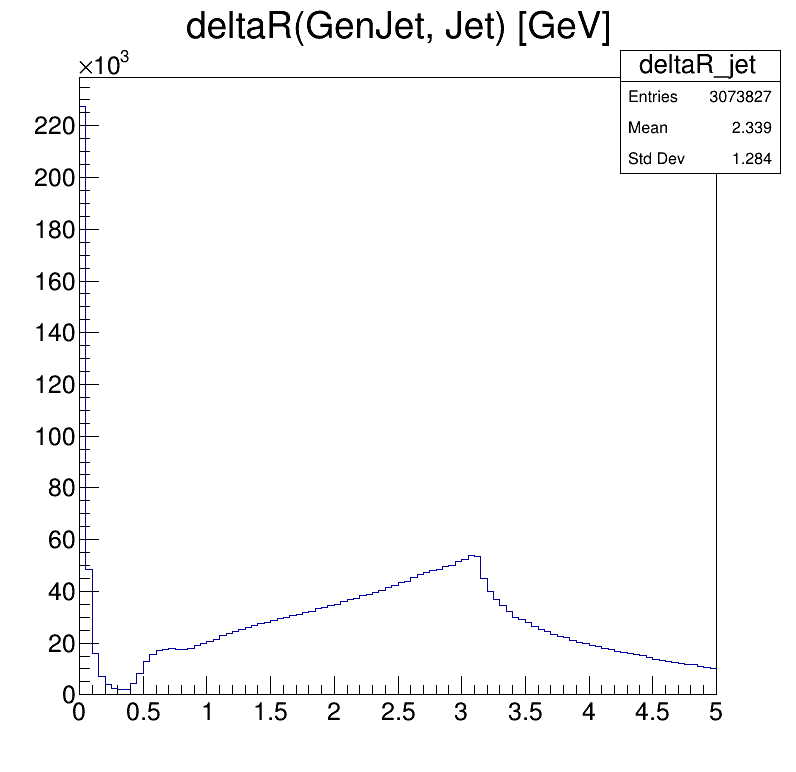

In [40]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_jet.Clone()
h1.Draw()
c.Draw()

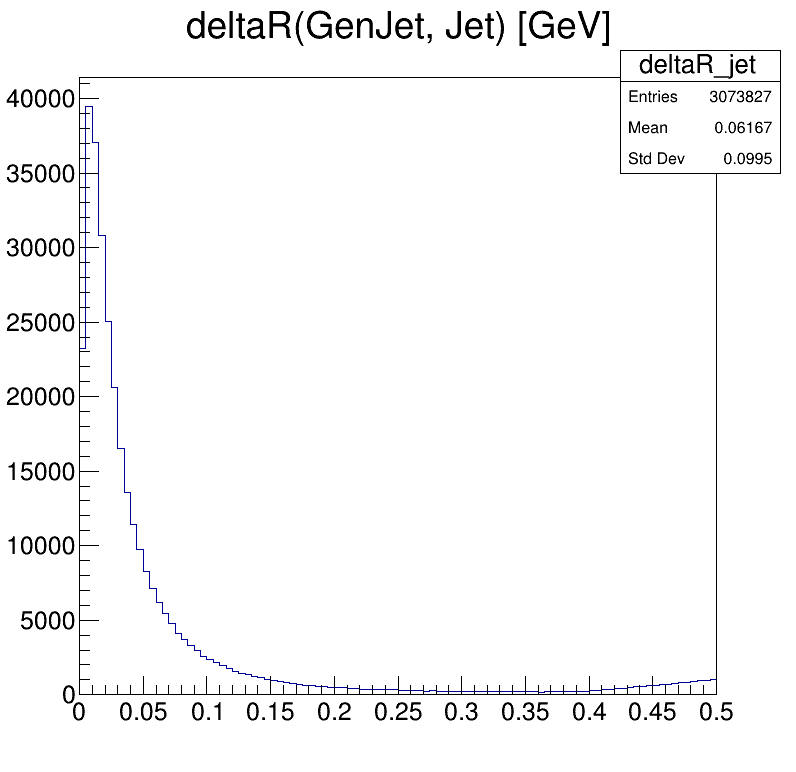

In [42]:
# deltaR
c = ROOT.TCanvas("", "", 800, 800)
h1 = deltar_gen_reco_jet_zoomed.Clone()
h1.Draw()
c.Draw()

In [10]:
# lets take 0.3 as limit
# seems that cutting in 0.1 is a good idea. Let's use this cut to obtain eff vs gen pt


In [24]:
# pt
hmodel = ("Pt","Gen Pt [GeV]", 50, 0, 200.)
efficient_genjet_pts = df.Define("efficient_genjet_pts", "efficient_gen_pts(GenJet_pt, GenJet_eta, GenJet_phi, GenJet_mass, Jet_pt, Jet_eta, Jet_phi, Jet_mass, 0.3)").Histo1D(hmodel, "efficient_genjet_pts")
all_genjet_pts = df.Histo1D(hmodel, "GenJet_pt")


efficient_genb_pts = df.Define("efficient_genb_pts", "efficient_gen_pts(GenJet_pt[GenJet_hadronFlavour==5], GenJet_eta[GenJet_hadronFlavour==5], GenJet_phi[GenJet_hadronFlavour==5], GenJet_mass[GenJet_hadronFlavour==5], Jet_pt[Jet_btagDeepFlavB > 0.2770], Jet_eta[Jet_btagDeepFlavB > 0.2770], Jet_phi[Jet_btagDeepFlavB > 0.2770], Jet_mass[Jet_btagDeepFlavB > 0.2770], 0.3)").Histo1D(hmodel, "efficient_genb_pts")
all_genb_pts = df.Define("genb_pts", "GenJet_pt[GenJet_hadronFlavour==5]").Histo1D(hmodel, "genb_pts")


# eta
hmodel = ("b #eta","b #eta", 50, -5, 5.)
efficient_genb_etas = df.Define("efficient_genjet_etas", "efficient_feat(GenJet_eta[GenJet_hadronFlavour==5], "
                                  "GenJet_pt[GenJet_hadronFlavour==5], GenJet_eta[GenJet_hadronFlavour==5], "
                                  "GenJet_phi[GenJet_hadronFlavour==5], GenJet_mass[GenJet_hadronFlavour==5], "
                                  "Jet_pt[Jet_btagDeepFlavB > 0.2770], Jet_eta[Jet_btagDeepFlavB > 0.2770], "
                                  "Jet_phi[Jet_btagDeepFlavB > 0.2770], Jet_mass[Jet_btagDeepFlavB > 0.2770], 0.3)"
                                 ).Histo1D(hmodel, "efficient_genjet_etas")
all_genb_etas = df.Define("genb_etas", "GenJet_eta[GenJet_hadronFlavour==5]").Histo1D(hmodel, "genb_etas")

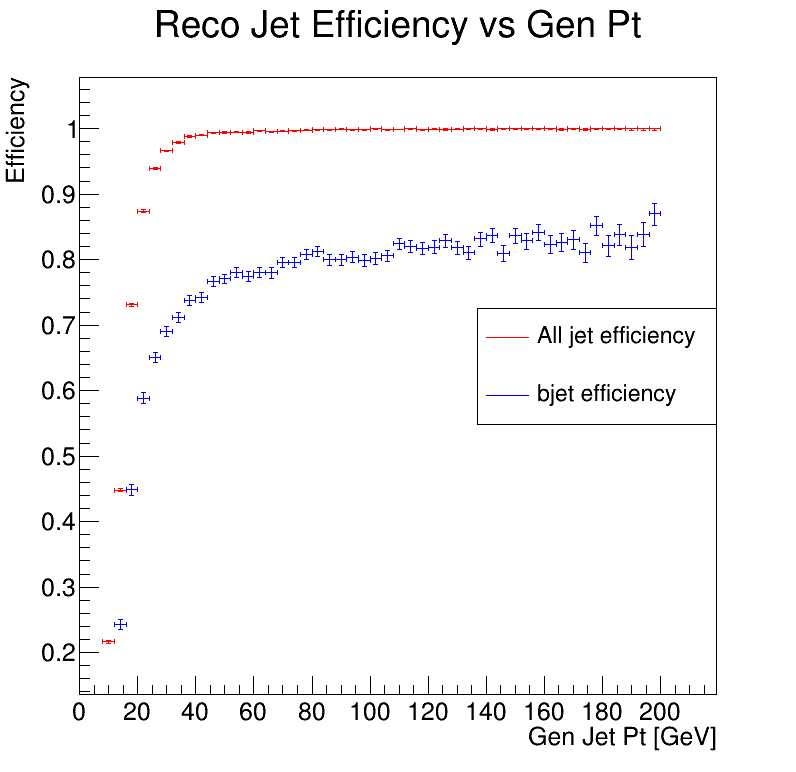

In [28]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_genjet_pts.Clone()
h2 = all_genjet_pts.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Reco Jet Efficiency vs Gen Pt; Gen Jet Pt [GeV]; Efficiency")

h3 = efficient_genb_pts.Clone()
h4 = all_genb_pts.Clone()

eff2 = ROOT.TEfficiency(h3, h4)
eff2.SetLineColor(ROOT.kBlue)


leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "All jet efficiency", "l")
leg.AddEntry(eff2, "bjet efficiency", "l")

eff.Draw()
eff2.Draw("same")
leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

In [16]:
hmodel = ("b #eta","b #eta", 50, -5, 5.)
all_genb_etas = df.Define("genb_eta", "GenJet_eta[GenJet_hadronFlavour==5]").Histo1D(hmodel, "genb_eta")
all_recob_etas = df.Define("recob_eta", "Jet_eta[Jet_btagDeepFlavB > 0.2770]").Histo1D(hmodel, "recob_eta")

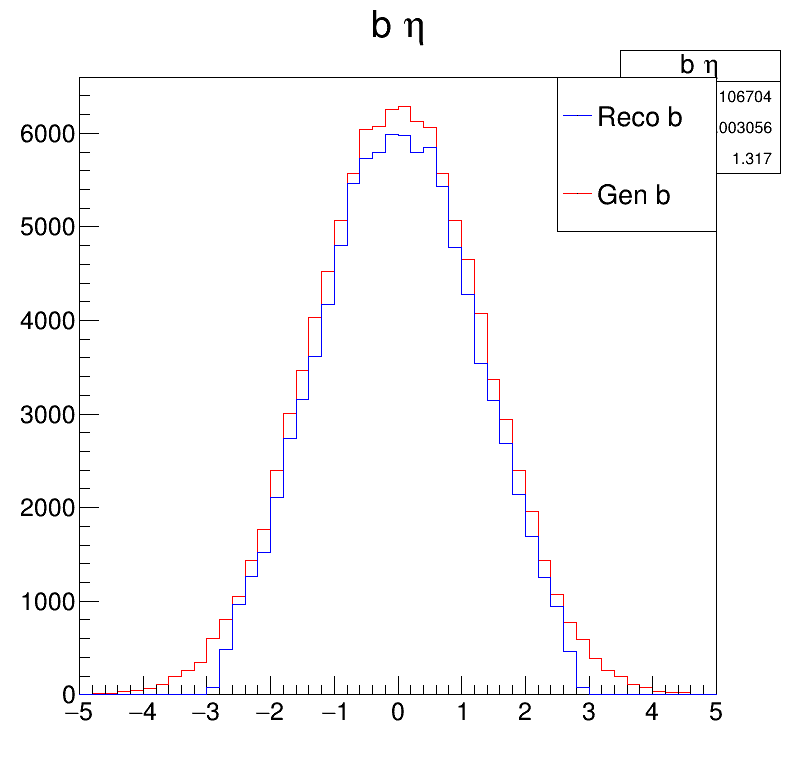

In [17]:
# Distribution of genb_eta and recob_eta
c = ROOT.TCanvas("", "", 800, 800)
h1 = all_recob_etas.Clone()
h2 = all_genb_etas.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Reco b")
leg.AddEntry(h2, "Gen b")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")    
   
leg.Draw()
c.Draw()

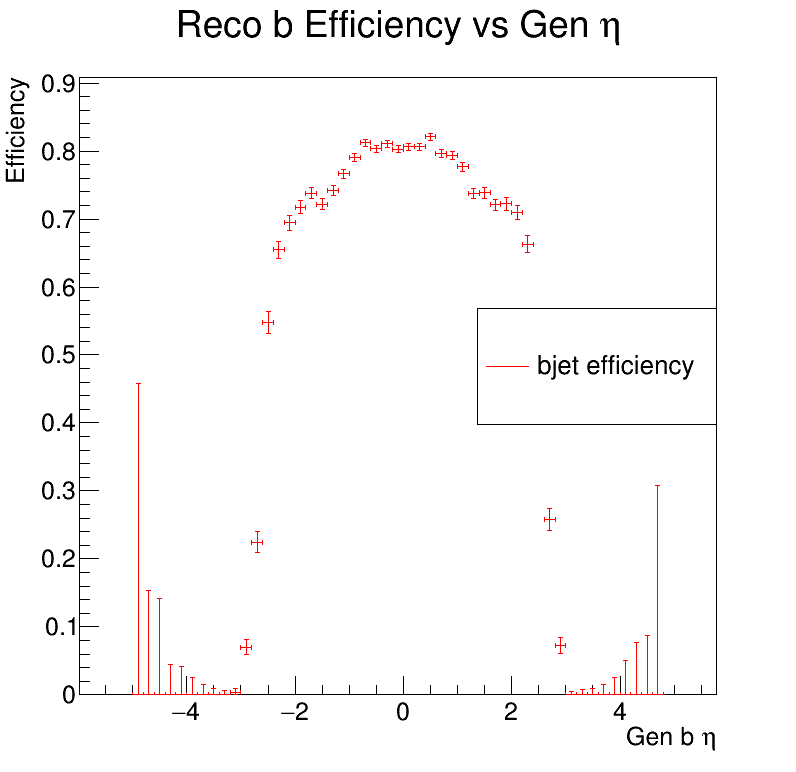

In [25]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = efficient_genb_etas.Clone()
h2 = all_genb_etas.Clone()

eff = ROOT.TEfficiency(h1, h2)
eff.SetLineColor(ROOT.kRed)

eff.SetTitle("Reco b Efficiency vs Gen #eta; Gen b #eta; Efficiency")


leg = ROOT.TLegend(0.6, 0.45, 0.9, 0.6)
leg.AddEntry(eff, "bjet efficiency", "l")

eff.Draw()
leg.Draw()
#h2.Draw()
#h1.Draw("same")
c.Draw()

In [28]:
# mother particles

ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_mother_particle_pdgids_bis (Vint pdgs, int pdgid, Vint mother_indexes){
        ROOT::RVec<int> mother_pdgs;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid) continue;
            }
            mother_pdgs.push_back(pdgs[mother_indexes[i]]);
        }
        return mother_pdgs;
    }
    ROOT::RVec<int> get_grandmother_particle_pdgid_bis (Vint pdgs, int pdgid, Vint mother_indexes){
        ROOT::RVec<int> grandmother_pdgs;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid) continue;
                if (abs(pdgs[mother_indexes[i]]) != pdgid) continue;
            }            
            grandmother_pdgs.push_back(pdgs[mother_indexes[mother_indexes[i]]]);
        }
        return grandmother_pdgs;
    }
""")

True

In [32]:
hmodel = ("Mother pdg ids","pdgid", 30, 0, 30)
gen_tau_mother_pdgids = df.Define("gen_muon_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_mother_pdgids")

In [30]:
hmodel = ("Mother pdg ids","pdgid", 2000, 0, 2000)
gen_tau_mother_pdgids = df.Define("gen_tau_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_mother_pdgids")
gen_tau_mother_pdgids_higgs = df.Define("gen_tau_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_mother_pdgids")

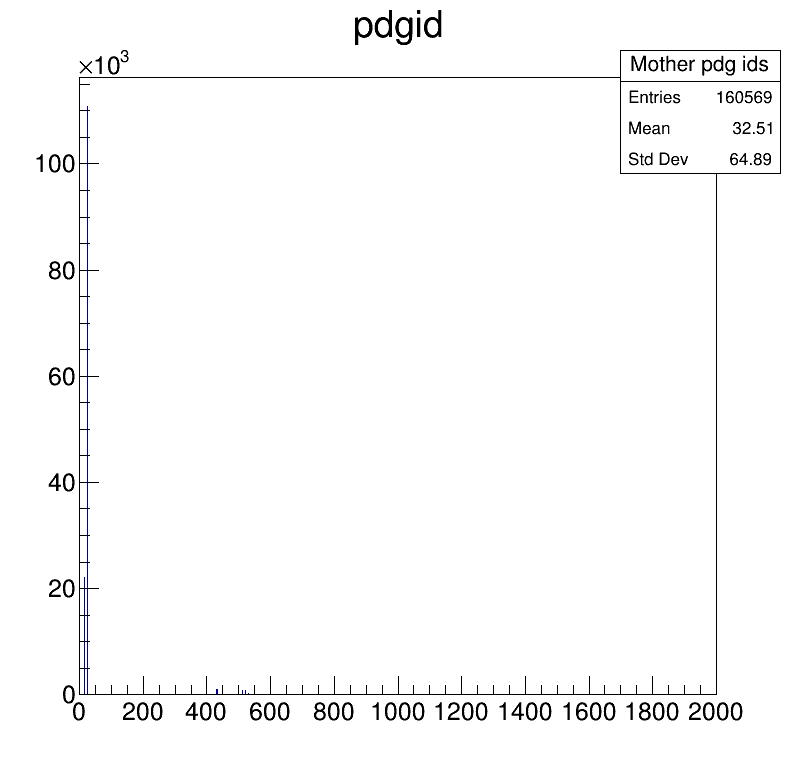

In [34]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_mother_pdgids.Clone()
#h1.GetXaxis().SetRangeUser(400, 600)
h1.Draw()
c.Draw()

In [36]:
tau = h1.GetBinContent(15 + 1)
higgs = h1.GetBinContent(25 + 1)
others = h1.Integral() - tau - higgs
print higgs, others

110800.0 2688.0


In [34]:
hmodel = ("Mother pdg ids","pdgid", 30, 0, 30)
gen_tau_h_mother_pdgids = df.Define("gen_tau_h_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, -1, GenVisTau_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_h_mother_pdgids")

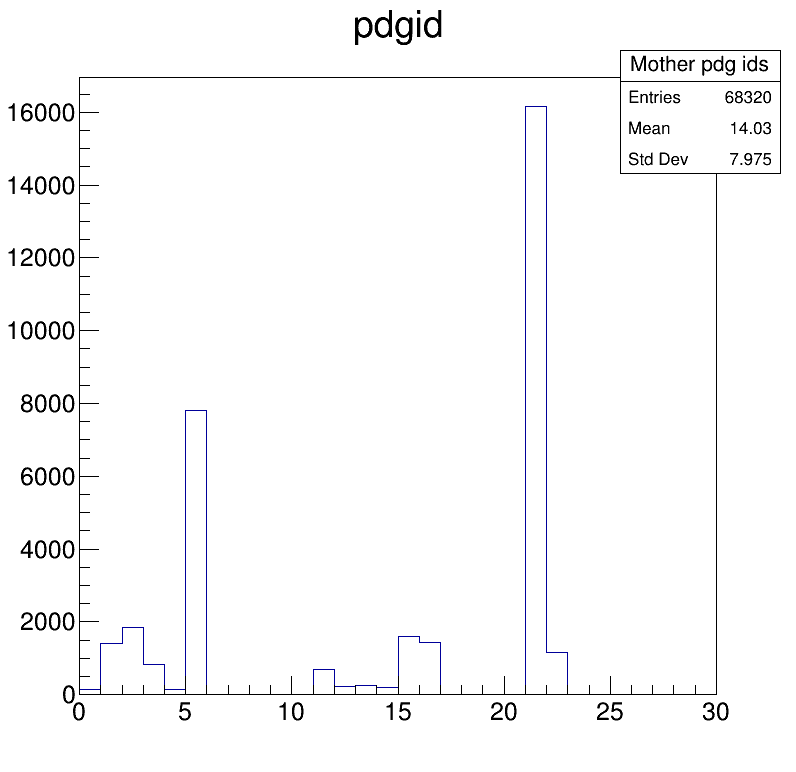

In [35]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_h_mother_pdgids.Clone()
h1.Draw()
c.Draw()

In [10]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_status(Vint pdgs, int pdgid, Vint status){
        ROOT::RVec<int> thisid_status;
        for (size_t i = 0; i < status.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid) continue;
            }
            thisid_status.push_back(status[i]);
        }
        return thisid_status;
    }
""")

True

In [19]:
hmodel = ("Status","Status", 200, 0, 200)
gen_tau_status = df.Define("gen_tau_status",
                           "get_status(GenPart_pdgId, 15, GenPart_status)"
                          ).Histo1D(hmodel, "gen_tau_status")

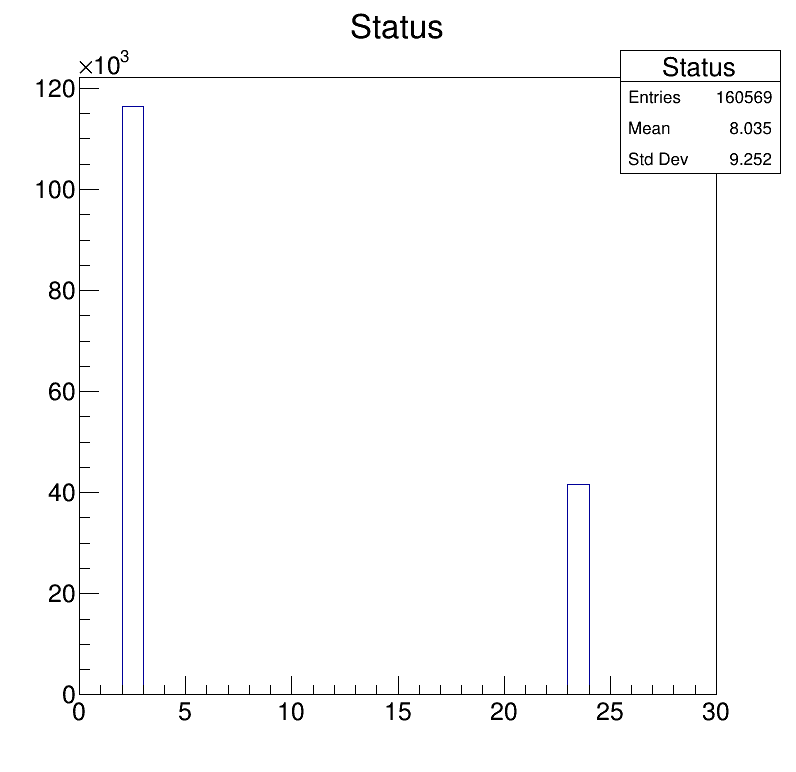

In [20]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_status.Clone()
h1.GetXaxis().SetRangeUser(0, 30)
h1.Draw()
#c.SetLogx()
c.Draw()

In [4]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_mother_particle_pdgids_status2 (Vint pdgs, int pdgid, Vint mother_indexes, Vint status){
        ROOT::RVec<int> mother_pdgs;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid || status[i] != 2) continue;
            }
            mother_pdgs.push_back(pdgs[mother_indexes[i]]);
        }
        return mother_pdgs;
    }
""")

True

In [5]:
hmodel = ("Mother pdg ids","pdgid", 60, -30, 30)
gen_tau_mother_pdgids_status2 = df.Define("gen_muon_mother_pdgids_status2",
                                   "get_mother_particle_pdgids_status2(GenPart_pdgId, 15, "
                                    "GenPart_genPartIdxMother, GenPart_status)"
                                  ).Histo1D(hmodel, "gen_muon_mother_pdgids_status2")

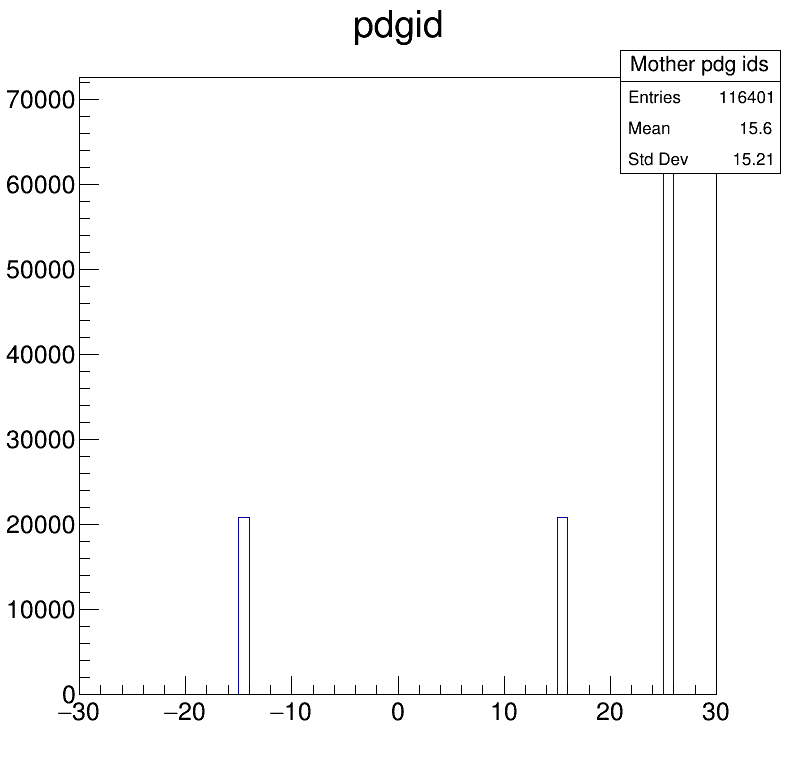

In [6]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_mother_pdgids_status2.Clone()
h1.Draw()
c.Draw()

In [10]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_status_mother15_bis(Vint pdgs, int pdgid, Vint mother_indexes, Vint status){
        ROOT::RVec<int> thisid_status;
        for (size_t i = 0; i < status.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid || abs(pdgs[mother_indexes[i]]) != 25) continue;
            }
            thisid_status.push_back(status[i]);
        }
        return thisid_status;
    }
""")

True

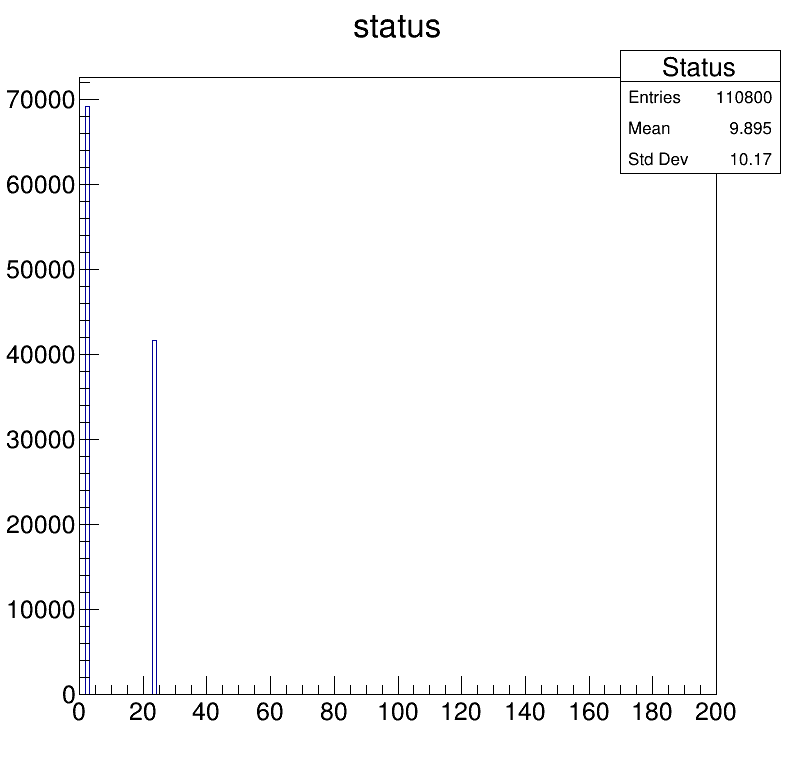

In [12]:
hmodel = ("Status","status", 200, 0, 200)
gen_tau_status_mother15 = df.Define("gen_tau_status_mother15",
                           "get_status_mother15_bis(GenPart_pdgId, 15, GenPart_genPartIdxMother, GenPart_status)"
                          ).Histo1D(hmodel, "gen_tau_status_mother15")


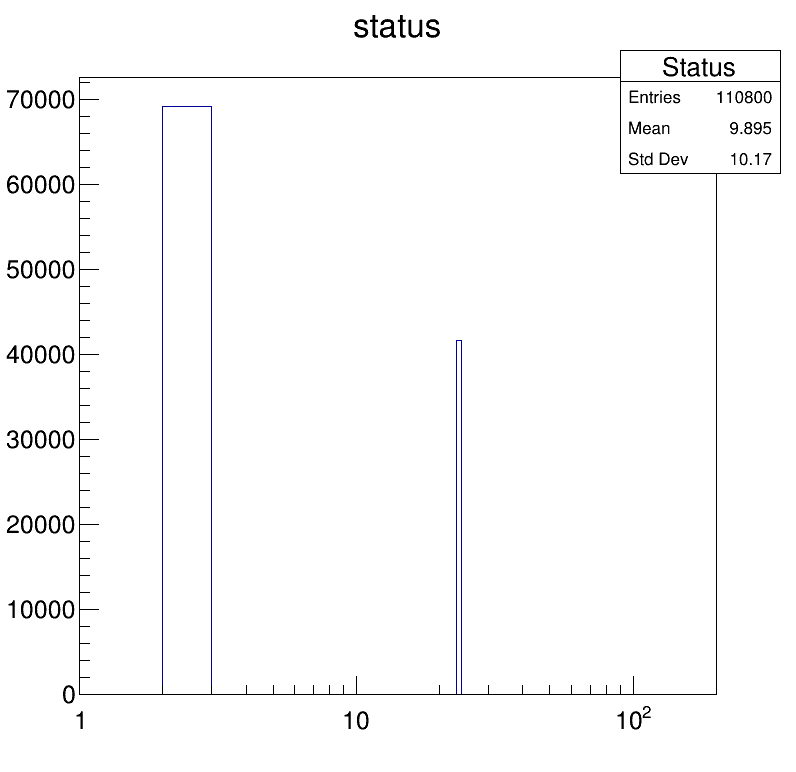

In [13]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_status_mother15.Clone()
h1.Draw()
c.SetLogx()
c.Draw()

In [9]:
hmodel = ("Mother pdg ids","pdgid", 200, 0, 200)
gen_gamma_mother_pdgids = df.Define("gen_gamma_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 22, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_gamma_mother_pdgids")

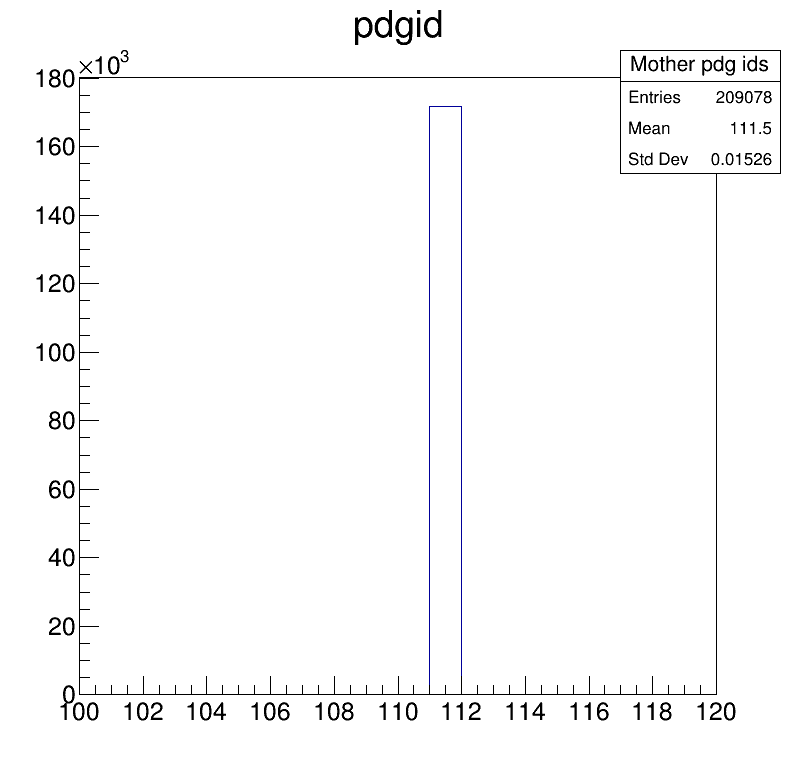

In [12]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_gamma_mother_pdgids.Clone()
h1.GetXaxis().SetRangeUser(100, 120)
h1.Draw()
c.Draw()

In [5]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_grandmother_particle_pdgid (Vint pdgs, int pdgid, Vint mother_indexes){
        ROOT::RVec<int> grandmother_pdgs;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid) continue;
                if (abs(pdgs[mother_indexes[i]]) != pdgid) continue;
            }            
            grandmother_pdgs.push_back(pdgs[mother_indexes[mother_indexes[i]]]);
        }
        return grandmother_pdgs;
    }
""")

True

In [21]:
hmodel = ("Grandmother pdg ids","pdgid", 40, 0, 40)
gen_tau_grandmother_pdgids = df.Define("gen_tau_grandmother_pdgids",
                                   "get_grandmother_particle_pdgid(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_grandmother_pdgids")

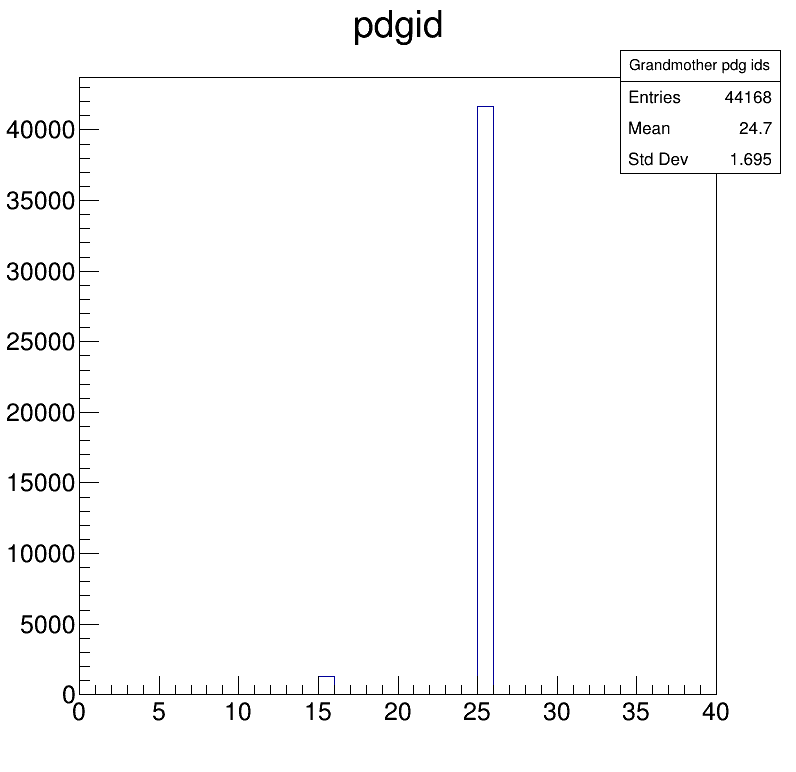

In [22]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_grandmother_pdgids.Clone()
h1.Draw()
c.Draw()

In [24]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_grandgrandmother_particle_pdgid (Vint pdgs, int pdgid, Vint mother_indexes){
        ROOT::RVec<int> grandgrandmother_pdgs;
        for (size_t i = 0; i < mother_indexes.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid) continue;
                if (abs(pdgs[mother_indexes[i]]) != pdgid) continue;
                if (abs(pdgs[mother_indexes[mother_indexes[i]]]) != pdgid) continue;
            }            
            grandgrandmother_pdgs.push_back(pdgs[mother_indexes[mother_indexes[mother_indexes[i]]]]);
        }
        return grandgrandmother_pdgs;
    }
""")

True

In [25]:
hmodel = ("Grandgrandmother pdg ids","pdgid", 40, 0, 40)
gen_tau_grandgrandmother_pdgids = df.Define("gen_tau_grandgrandmother_pdgids",
                                   "get_grandgrandmother_particle_pdgid(GenPart_pdgId, 15, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_tau_grandgrandmother_pdgids")

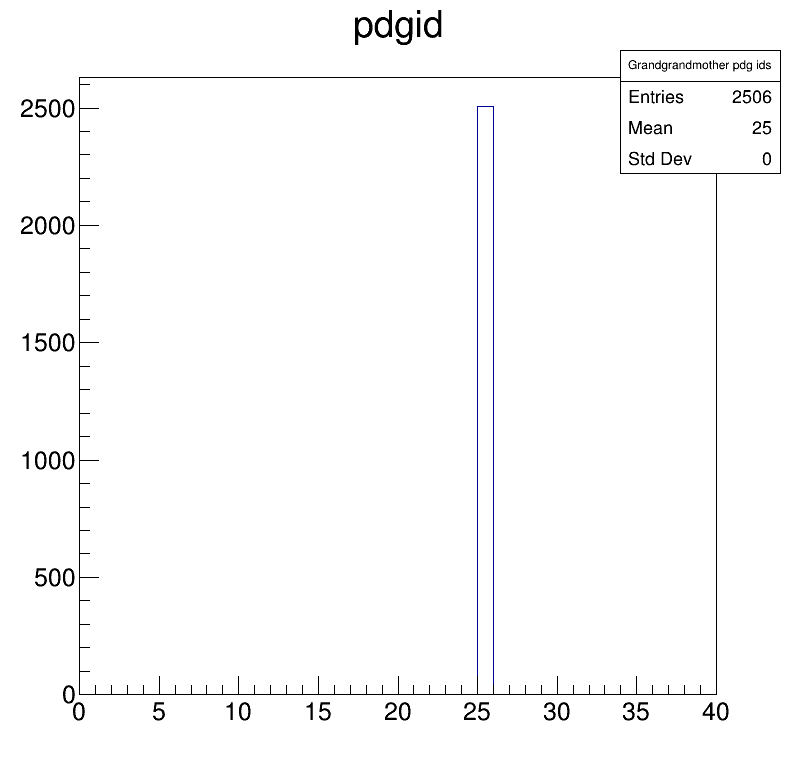

In [27]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_tau_grandgrandmother_pdgids.Clone()
h1.Draw()
c.Draw()

In [9]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&; 
    ROOT::RVec<int> get_good_indexes_bis (Vint pdgs, int pdgid, int initial_pdgid, Vint mother_indexes){
        ROOT::RVec<int> indexes_to_remove;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            if (abs(pdgs[i]) != pdgid) continue;
            int mother_index = mother_indexes[i];
            while (true) {
                if (abs(pdgs[mother_index]) != initial_pdgid) {
                    indexes_to_remove.push_back(mother_index);
                    mother_index = mother_indexes[mother_index];
                    if (mother_index == -1) break;
                } else break;
            }
        }
        ROOT::RVec<int> final_indexes;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            if (abs(pdgs[i]) != pdgid) continue;
            bool found = false;
            for (int j : indexes_to_remove) {
                if (i == j) found = true;
            }
            if (!found) final_indexes.push_back(i);
        }
        return final_indexes;
    }
""")

True

In [10]:
ROOT.gInterpreter.Declare("""
    using Vfloat = const ROOT::RVec<float>&; 
    ROOT::RVec<float> get_good_vars (ROOT::RVec<int> good_indexes, Vfloat var){
        ROOT::RVec<float> good_vars;
        for (size_t i = 0; i < good_indexes.size(); i++) {
            good_vars.push_back(var[good_indexes[i]]);
        }
        return good_vars;
    }
""")

True

In [17]:
hmodel = ("Gen tau pt","Tau pt; pt[GeV]; events", 50, 0, 200)
good_pts = df.Define("good_gen_tau_pts", 
                     "get_good_vars(get_good_indexes_bis(GenPart_pdgId, 15, 25, GenPart_genPartIdxMother), GenPart_pt)"
                    ).Histo1D(hmodel, "good_gen_tau_pts")
all_pts = df.Define("all_gen_tau_pts", "GenPart_pt[abs(GenPart_pdgId) == 15]").Histo1D(hmodel, "all_gen_tau_pts")

hmodel = ("Status","Status", 200, 0, 200)
good_status = df.Define("good_gen_tau_status", 
                     "get_good_vars(get_good_indexes_bis(GenPart_pdgId, 15, 25, GenPart_genPartIdxMother), GenPart_status)"
                    ).Histo1D(hmodel, "good_gen_tau_status")

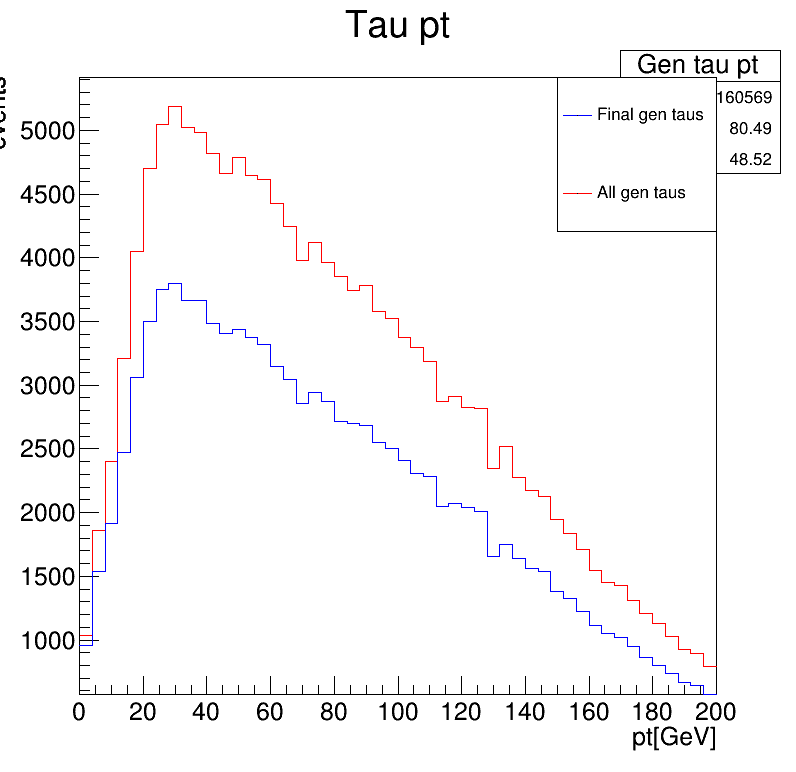

In [14]:
# final gen taus vs all gen_taus
c = ROOT.TCanvas("", "", 800, 800)
h1 = good_pts.Clone()
h2 = all_pts.Clone()

h1.SetLineColor(ROOT.kBlue)
h2.SetLineColor(ROOT.kRed)

leg = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
leg.AddEntry(h1, "Final gen taus")
leg.AddEntry(h2, "All gen taus")

#h4.Draw()

if h1.GetMaximum() > h2.GetMaximum():
    h1.Draw("same")
    h2.Draw("same")
else:
    h2.Draw("same")
    h1.Draw("same")    
   
leg.Draw()
c.Draw()

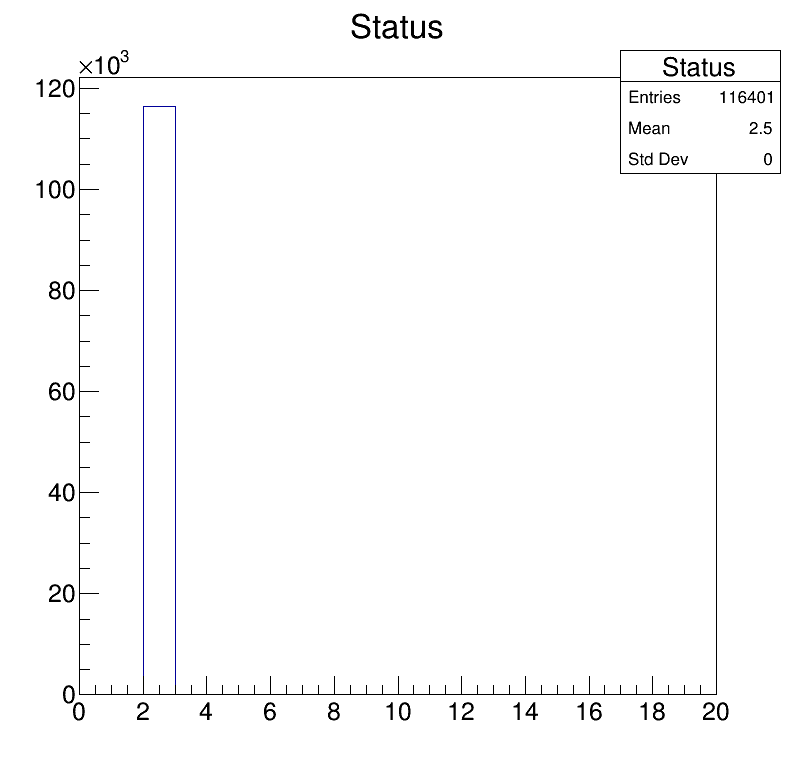

In [20]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = good_status.Clone()
h1.GetXaxis().SetRangeUser(0,20)
h1.Draw()
c.Draw()

In [7]:
hmodel = ("Mother pdg ids","pdgid", 30, 0, 30)
gen_higgs_mother_pdgids = df.Define("gen_higgs_mother_pdgids",
                                   "get_mother_particle_pdgids_bis(GenPart_pdgId, 25, GenPart_genPartIdxMother)"
                                  ).Histo1D(hmodel, "gen_higgs_mother_pdgids")

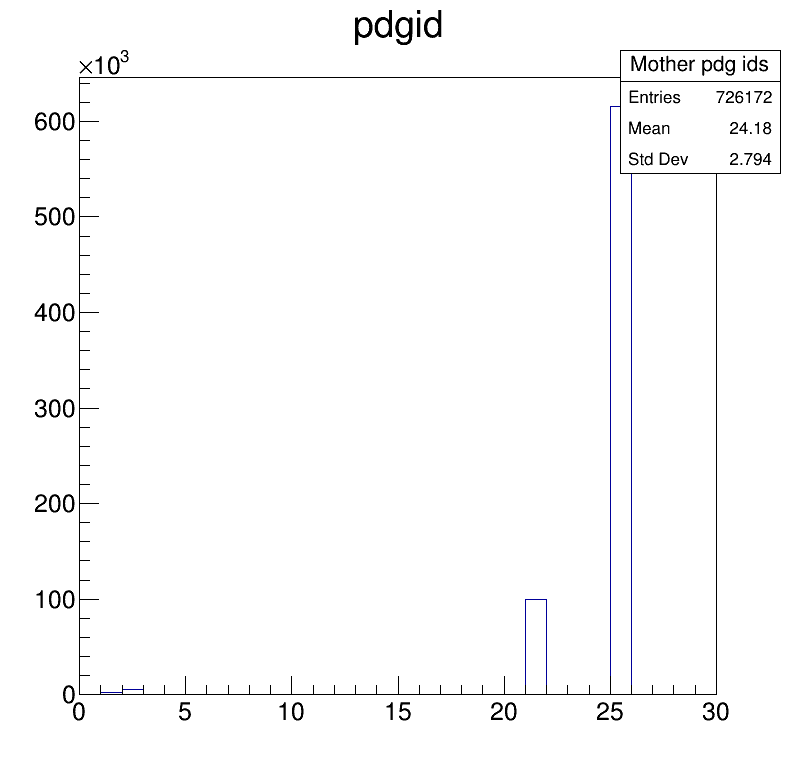

In [8]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_higgs_mother_pdgids.Clone()
h1.Draw()
c.Draw()

In [11]:
hmodel = ("Status","Status", 200, 0, 200)
gen_higgs_status = df.Define("gen_higgs_status",
                           "get_status(GenPart_pdgId, 25, GenPart_status)"
                          ).Histo1D(hmodel, "gen_higgs_status")

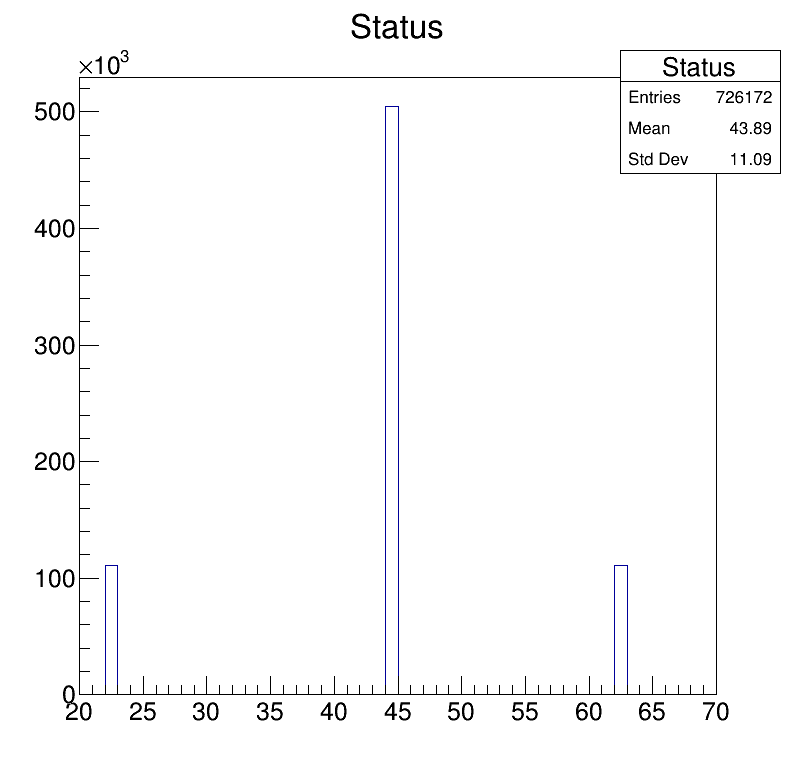

In [15]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_higgs_status.Clone()
h1.GetXaxis().SetRangeUser(20, 70)
h1.Draw()
c.Draw()

In [16]:
ROOT.gInterpreter.Declare("""
    using Vint = const ROOT::RVec<int>&;      
    ROOT::RVec<int> get_status_mother21_bis(Vint pdgs, int pdgid, Vint mother_indexes, Vint status){
        ROOT::RVec<int> thisid_status;
        for (size_t i = 0; i < status.size(); i++){
            if (pdgid != -1){
                if (abs(pdgs[i]) != pdgid || abs(pdgs[mother_indexes[i]]) != 21) continue;
            }
            thisid_status.push_back(status[i]);
        }
        return thisid_status;
    }
""")

True

In [17]:
hmodel = ("Status","Status", 200, 0, 200)
gen_higgs_status_motherpdg21 = df.Define("gen_higgs_status_pdg21",
                           "get_status_mother21_bis(GenPart_pdgId, 25, GenPart_genPartIdxMother, GenPart_status)"
                          ).Histo1D(hmodel, "gen_higgs_status_pdg21")

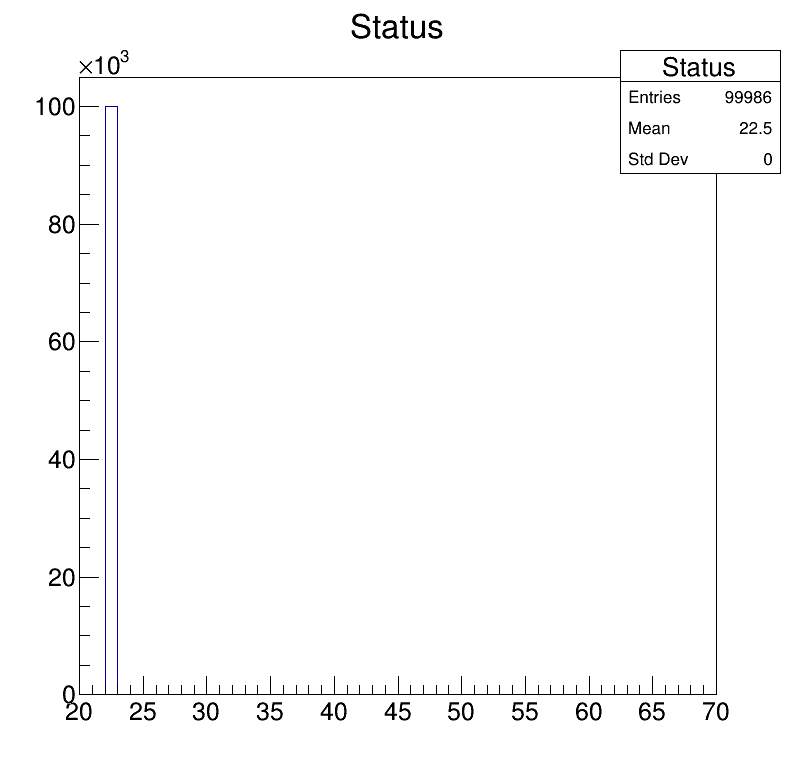

In [18]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = gen_higgs_status_motherpdg21.Clone()
h1.GetXaxis().SetRangeUser(20, 70)
h1.Draw()
c.Draw()

In [1]:
import ROOT

Welcome to JupyROOT 6.18/04


In [ ]:
filename  = "root://ingrid-se04.cism.ucl.ac.be:1094//store/mc/RunIIAutumn18NanoAODv7/GluGluToHHTo2B2Tau_node_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8/NANOAODSIM/Nano02Apr2020_102X_upgrade2018_realistic_v21-v1/100000/166F2B3B-1C4C-3948-B794-6DA8F17737F6.root"
f = ROOT.TFile.Open(filename)


"""
    using Vint = const ROOT::RVec<int>&; 
    ROOT::RVec<int> get_good_indexes_test3 (Vint pdgs, int pdgid, int initial_pdgid, Vint mother_indexes){
        ROOT::RVec<int> indexes_to_remove;
        //std::vector<int> indexes_to_remove;
        for (size_t i = 0; i < mother_indexes.size(); i++) {
            if (abs(pdgs[i]) != pdgid) continue;
            size_t mother_index = mother_indexes[i];
            while (abs(pdgs[mother_index]) != initial_pdgid) {
                indexes_to_remove.push_back(mother_index);
                mother_index = mother_indexes[mother_index];
            }
        }
        return indexes_to_remove;
    }
"""

histo = ROOT.TH1F("", "", 100, 0, 100)

iev = 0
for ev in f.Events:
    iev += 1
    indexes_to_remove = []
    for i in range(0, ev.nGenPart):
        if abs(ev.GenPart_pdgId[i]) != 15: continue
        mother_index = ev.GenPart_genPartIdxMother[i]
        while True:
            if mother_index == -1: break
            if (abs(ev.GenPart_pdgId[mother_index]) == 25): break
            indexes_to_remove.append(mother_index)
            mother_index = ev.GenPart_genPartIdxMother[mother_index]
    for i in range(0, ev.nGenPart):
        if abs(ev.GenPart_pdgId[i]) != 15: continue
        if i not in indexes_to_remove:
            histo.Fill(ev.GenPart_status[i])
    if iev == 10000: break







In [ ]:
c = ROOT.TCanvas("", "", 800, 800)
h1 = histo.Clone()
#h1.GetXaxis().SetRangeUser(20, 70)
h1.Draw()
c.Draw()